## Student debt and the hidden racial wealth gap in federal aid formulas
### by Jay Colond, Charlie Eaton, Luis Ruben Gonzalez, and Waleed Rajabally*, University of California, Merced
### September 28, 2020

In [2]:
%set graph_format svg

In [1]:
set scheme dubois
set linesize 255
set more off
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("AGI") firstrow clear
quietly label define AGI_lab 1 "$-$30K" 2 "$30K-$48K" 3 "$48K-$75K" 4 "$75K-$110K" 5 "$110K +" 
quietly label values AGI AGI_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

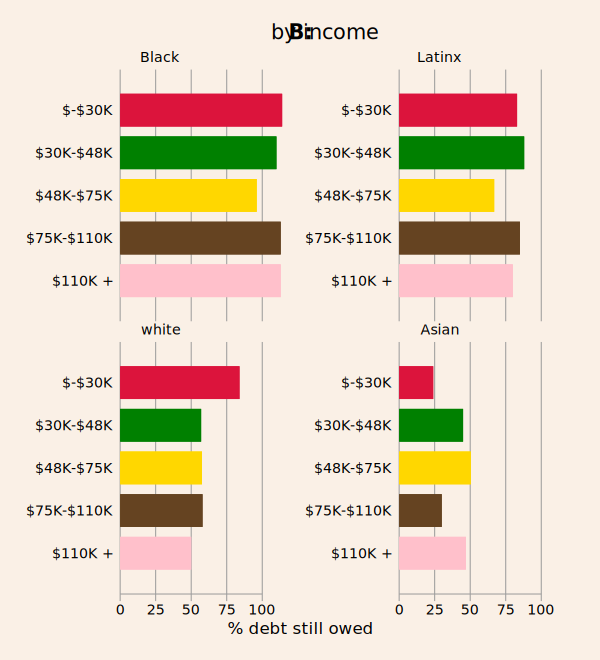

In [3]:
local opts asyvars showyvars xsize(5) ysize(5.5) name(AGI, replace) over(AGI, gap(30))
local opts `opts' ylabel(0(25)100, labsize(small)) ytitle("% debt still owed")
local by by(Race_Ethnicity, legend(off) title({bf:B:} by income) imargin(zero) note(""))
graph hbar Debt_ratio, `opts' `by'

In [4]:
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("EFC") firstrow clear
quietly label define EFC_lab 1 "$0" 2 "$1-$2.6K" 3 "$2.6K-$7.2K" 4 "$7.2K-$15.6K" 5 "$15.6K+" 
quietly label values EFC EFC_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

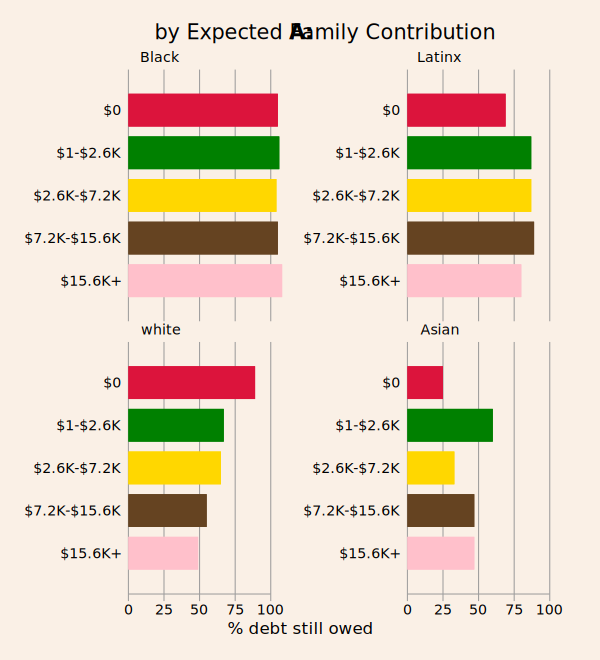

In [5]:
local over over(EFC, gap(30)) ytitle(% debt still owed) ylabel(0(25)100, labsize(small))
local asyvars asyvars showyvars xsize(5) ysize(5.5)  by(Race_Ethnicity, imargin(zero) legend(off)
local title title({bf:A:} by Expected Family Contribution) note("")) name(EFC, replace)

graph hbar Debt_ratio, `over' `asyvars' `title'

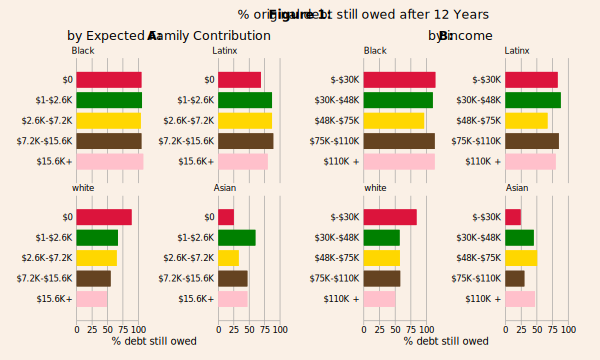

In [6]:
local imargin imargin(small) iscale(1)
local title title({bf:Figure 1:} % original debt still owed after 12 Years)
local xsize xsize(10) ysize(6) name(AGIEFC, replace) rows(1)
graph combine EFC AGI, `imargin' `title' `xsize'

In [7]:
clear
quietly set obs `=20'
quietly gen race=4
quietly replace race=3 if _n<16
quietly replace race=1 if _n<11
quietly replace race=2 if _n<6
label define race 1 "Black" 2 "white" 3 "Latinx" 4 "Asian"
label values race race
quietly gen efc=1
quietly replace efc=2 if _n==2 | _n==7 | _n==12 | _n==17
quietly replace efc=3 if _n==3 | _n==8 | _n==13 | _n==18
quietly replace efc=4 if _n==4 | _n==9 | _n==14 | _n==19
quietly replace efc=5 if _n==5 | _n==10 | _n==15 | _n==20
quietly label define EFC_lab 1 "$0" 2 "$1-$2.6K" 3 "$2.6K-$7.2K" 4 "$7.2K-$15.6K" 5 "$15.6K+" 
quietly label values efc EFC_lab
quietly gen pcthelp=11.6368 if _n==1
quietly replace pcthelp=8.632 if _n==6
quietly replace pcthelp=13.0130 if _n==11
quietly replace pcthelp=9.3606 if _n==16
quietly replace pcthelp=15.2168 if _n==2
quietly replace pcthelp=11.3907 if _n==7
quietly replace pcthelp=15.0896 if _n==12
quietly replace pcthelp=22.6309 if _n==17
quietly replace pcthelp=16.0815 if _n==3
quietly replace pcthelp=7.6035 if _n==8
quietly replace pcthelp=15.4896 if _n==13
quietly replace pcthelp=22.4566 if _n==18
quietly replace pcthelp=21.5403 if _n==4
quietly replace pcthelp=9.5468 if _n==9
quietly replace pcthelp=18.0492 if _n==14
quietly replace pcthelp=. if _n==19
quietly replace pcthelp=25.6239 if _n==5
quietly replace pcthelp=30.1301 if _n==10
quietly replace pcthelp=16.1942 if _n==15
quietly replace pcthelp=. if _n==20
quietly rename race race2
quietly recode race2 (1=1 Black)(2=3 white)(3=2 Latinx)(4=4 Asian), gen(race)

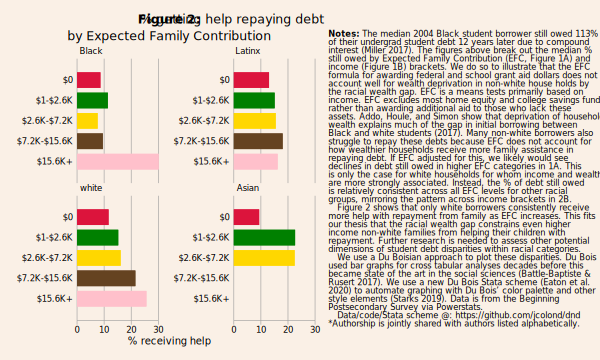

In [8]:
#delimit ;
local note1 note(
"{bf:Notes:} The median 2004 Black student borrower still owed 113%"
"of their undergrad student debt 12 years later due to compound"
"interest (Miller 2017). The figures above break out the median %"
"still owed by Expected Family Contribution (EFC, Figure 1A) and"
"income (Figure 1B) brackets. We do so to illustrate that the EFC "
"formula for awarding federal and school grant aid dollars does not"
"account well for wealth deprivation in non-white house holds by "
"the racial wealth gap. EFC is a means tests primarily based on "
"income. EFC excludes most home equity and college savings funds"
"rather than awarding additional aid to those who lack these"
"assets. Addo, Houle, and Simon show that deprivation of household"
"wealth explains much of the gap in initial borrowing between"
"Black and white students (2017). Many non-white borrowers also"
"struggle to repay these debts because EFC does not account for"
"how wealthier households receive more family assistance in"
"repaying debt. If EFC adjusted for this, we likely would see"
"declines in debt still owed in higher EFC categories in 1A. This"
"is only the case for white households for whom income and wealth"
"are more strongly associated. Instead, the % of debt still owed"
"is relatively consistent across all EFC levels for other racial" ;
local note1 `note1' 
"groups, mirroring the pattern across income brackets in 2B."
"   Figure 2 shows that only white borrowers consistently receive"
"more help with repayment from family as EFC increases. This fits"
"our thesis that the racial wealth gap constrains even higher"
"income non-white families from helping their children with"
"repayment. Further research is needed to assess other potential"
"dimensions of student debt disparities within racial categories."
"   We use a Du Boisian approach to plot these disparities. Du Bois"
"used bar graphs for cross tabular analyses decades before this"
"became state of the art in the social sciences (Battle-Baptiste &"
"Rusert 2017). We use a new Du Bois Stata scheme (Eaton et al."
"2020) to automate graphing with Du Bois’ color palette and other"
"style elements (Starks 2019). Data is from the Beginning"
"Postsecondary Survey via Powerstats."
"   Data/code/Stata scheme @: https://github.com/jcolond/dnd"
"*Authorship is jointly shared with authors listed alphabetically."
, justification(left) size(2.3) position(3)) ;

#delimit cr

local over over(efc, gap(30)) ytitle("% receiving help") asyvars showyvars 
local xsize xsize(10) ysize(6) ylabel(0(10)30, labsize(small)) by(race, legend(off) imargin(zero)
local t2title t2title({bf:Figure 2:} % getting help repaying debt, size(medsmall))
local t1title t1title(by Expected Family Contribution, size(medsmall))) name(PCTHELP, replace)
graph hbar pcthelp, `over' `xsize' `t2title' `note1' `t1title' 

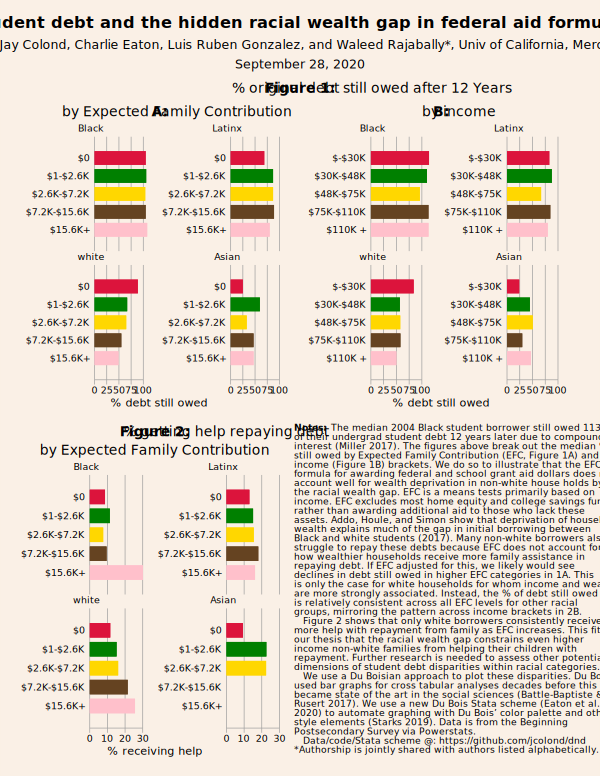










(file wealthgapstudentaid.pdf written in PDF format)

(file wealthgapstudentaid.eps written in EPS format)


In [9]:
graph set svg fontface Tahoma
graph set eps fontface Tahoma
graph set ps fontface Tahoma
local title title({bf:Student debt and the hidden racial wealth gap in federal aid formulas}, size(2.7))
local subtitle subtitle("by Jay Colond, Charlie Eaton, Luis Ruben Gonzalez, and Waleed Rajabally*, Univ of California, Merced", size(vsmall))
local t2title t2title("September 28, 2020", size(vsmall)) iscale(.667) rows(2) xsize(8.5) ysize(11) imargin(small)
graph combine AGIEFC PCTHELP, `title' `subtitle' `t2title' name(wealthgapstudentaid, replace)
graph export wealthgapstudentaid.pdf, replace name(wealthgapstudentaid)
graph export wealthgapstudentaid.eps, replace name(wealthgapstudentaid)